In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,2013,2013,NE,Nebraska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.6410409880005, -99.36572062299967)",OWS,OWS1,Q036,VALUE,31.0,Income,"Less than $15,000",INC,INCLESS15
19253,2013,2013,NE,Nebraska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.6410409880005, -99.36572062299967)",OWS,OWS1,Q036,VALUE,31.0,Income,"$15,000 - $24,999",INC,INC1525
19254,2013,2013,NE,Nebraska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.6410409880005, -99.36572062299967)",OWS,OWS1,Q036,VALUE,31.0,Income,"$25,000 - $34,999",INC,INC2535
19255,2013,2013,NE,Nebraska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.6410409880005, -99.36572062299967)",OWS,OWS1,Q036,VALUE,31.0,Income,"$35,000 - $49,999",INC,INC3550


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   19257 non-null  int64  
 1   YearEnd                     19257 non-null  int64  
 2   LocationAbbr                19257 non-null  object 
 3   LocationDesc                19257 non-null  object 
 4   Datasource                  19257 non-null  object 
 5   Class                       19257 non-null  object 
 6   Topic                       19257 non-null  object 
 7   Question                    19257 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             19256 non-null  object 
 10  Data_Value                  17614 non-null  float64
 11  Data_Value_Alt              17614 non-null  float64
 12  Data_Value_Footnote_Symbol  1642 non-null   object 
 13  Data_Value_Footnote         164

In [4]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

<ipython-input-4-af4968d13d2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
<ipython-input-4-af4968d13d2a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       19257 non-null  int64  
 1   LocationAbbr    19257 non-null  object 
 2   LocationDesc    19257 non-null  object 
 3   Data_Value      17614 non-null  float64
 4   Sample_Size     17614 non-null  float64
 5   Age(years)      4128 non-null   object 
 6   Education       2752 non-null   object 
 7   Income          4813 non-null   object 
 8   Race/Ethnicity  5498 non-null   object 
 9   LocationID      19256 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
df=df.dropna(subset=['Education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 3 to 19245
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       2752 non-null   int64  
 1   LocationAbbr    2752 non-null   object 
 2   LocationDesc    2752 non-null   object 
 3   Data_Value      2752 non-null   float64
 4   Sample_Size     2752 non-null   float64
 5   Age(years)      0 non-null      object 
 6   Education       2752 non-null   object 
 7   Income          0 non-null      object 
 8   Race/Ethnicity  0 non-null      object 
 9   LocationID      2752 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 236.5+ KB


In [7]:
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [8]:
df=lower_case_column_names(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1.0
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1.0
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1.0
6,2011,AL,Alabama,26.4,1812.0,NaN,College graduate,NaN,NaN,1.0
31,2011,AL,Alabama,33.2,1153.0,NaN,Less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
19217,2012,NE,Nebraska,11.3,5394.0,NaN,College graduate,NaN,NaN,31.0
19242,2013,NE,Nebraska,30.1,986.0,NaN,Less than high school,NaN,NaN,31.0
19243,2013,NE,Nebraska,30.9,5450.0,NaN,High school graduate,NaN,NaN,31.0
19244,2013,NE,Nebraska,32.1,4995.0,NaN,Some college or technical school,NaN,NaN,31.0


In [9]:
df.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid        float64
dtype: object

In [10]:
print(df.duplicated().sum())

3


In [11]:
df = df.drop_duplicates()

In [12]:
df.isna()

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
5,False,False,False,False,False,True,False,True,True,False
6,False,False,False,False,False,True,False,True,True,False
31,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
19217,False,False,False,False,False,True,False,True,True,False
19242,False,False,False,False,False,True,False,True,True,False
19243,False,False,False,False,False,True,False,True,True,False
19244,False,False,False,False,False,True,False,True,True,False


In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

yearstart           0.0
locationabbr        0.0
locationdesc        0.0
data_value          0.0
sample_size         0.0
age(years)        100.0
education           0.0
income            100.0
race/ethnicity    100.0
locationid          0.0
dtype: float64

In [14]:
df = df.drop(['age(years)'],1)

<ipython-input-14-91dcf96e044d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['age(years)'],1)


In [15]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [16]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,Less than high school,NaN,NaN,1.0
4,2011,AL,Alabama,32.8,2402.0,High school graduate,NaN,NaN,1.0
5,2011,AL,Alabama,33.8,1925.0,Some college or technical school,NaN,NaN,1.0
6,2011,AL,Alabama,26.4,1812.0,College graduate,NaN,NaN,1.0
31,2011,AL,Alabama,33.2,1153.0,Less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
19217,2012,NE,Nebraska,11.3,5394.0,College graduate,NaN,NaN,31.0
19242,2013,NE,Nebraska,30.1,986.0,Less than high school,NaN,NaN,31.0
19243,2013,NE,Nebraska,30.9,5450.0,High school graduate,NaN,NaN,31.0
19244,2013,NE,Nebraska,32.1,4995.0,Some college or technical school,NaN,NaN,31.0


In [17]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [18]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,less than high school,NaN,NaN,1.0
4,2011,al,alabama,32.8,2402.0,high school graduate,NaN,NaN,1.0
5,2011,al,alabama,33.8,1925.0,some college or technical school,NaN,NaN,1.0
6,2011,al,alabama,26.4,1812.0,college graduate,NaN,NaN,1.0
31,2011,al,alabama,33.2,1153.0,less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
19217,2012,ne,nebraska,11.3,5394.0,college graduate,NaN,NaN,31.0
19242,2013,ne,nebraska,30.1,986.0,less than high school,NaN,NaN,31.0
19243,2013,ne,nebraska,30.9,5450.0,high school graduate,NaN,NaN,31.0
19244,2013,ne,nebraska,32.1,4995.0,some college or technical school,NaN,NaN,31.0


In [19]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1.0
4,2011,32.8,2402.0,1.0
5,2011,33.8,1925.0,1.0
6,2011,26.4,1812.0,1.0
31,2011,33.2,1153.0,1.0
...,...,...,...,...
19217,2012,11.3,5394.0,31.0
19242,2013,30.1,986.0,31.0
19243,2013,30.9,5450.0,31.0
19244,2013,32.1,4995.0,31.0


In [20]:
numerical = numerical.fillna(numerical.mean())
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1.0
4,2011,32.8,2402.0,1.0
5,2011,33.8,1925.0,1.0
6,2011,26.4,1812.0,1.0
31,2011,33.2,1153.0,1.0
...,...,...,...,...
19217,2012,11.3,5394.0,31.0
19242,2013,30.1,986.0,31.0
19243,2013,30.9,5450.0,31.0
19244,2013,32.1,4995.0,31.0


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
19217,ne,nebraska,college graduate,NaN,NaN
19242,ne,nebraska,less than high school,NaN,NaN
19243,ne,nebraska,high school graduate,NaN,NaN
19244,ne,nebraska,some college or technical school,NaN,NaN


In [22]:
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
19217,ne,nebraska,college graduate,NaN,NaN
19242,ne,nebraska,less than high school,NaN,NaN
19243,ne,nebraska,high school graduate,NaN,NaN
19244,ne,nebraska,some college or technical school,NaN,NaN


In [23]:
categorical.columns

Index(['locationabbr', 'locationdesc', 'education', 'income',
       'race/ethnicity'],
      dtype='object')

In [24]:
in_map = {'less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4,
          '$75,000 or greater':5, 'data not reported':6}
in_map
df['income'] = df['income'].map(in_map)

In [25]:
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [26]:
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['race/ethnicity'] = df['race/ethnicity'].map(rc_map)

In [27]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,0,NaN,NaN,1.0
4,2011,al,alabama,32.8,2402.0,1,NaN,NaN,1.0
5,2011,al,alabama,33.8,1925.0,2,NaN,NaN,1.0
6,2011,al,alabama,26.4,1812.0,3,NaN,NaN,1.0
31,2011,al,alabama,33.2,1153.0,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
19217,2012,ne,nebraska,11.3,5394.0,3,NaN,NaN,31.0
19242,2013,ne,nebraska,30.1,986.0,0,NaN,NaN,31.0
19243,2013,ne,nebraska,30.9,5450.0,1,NaN,NaN,31.0
19244,2013,ne,nebraska,32.1,4995.0,2,NaN,NaN,31.0


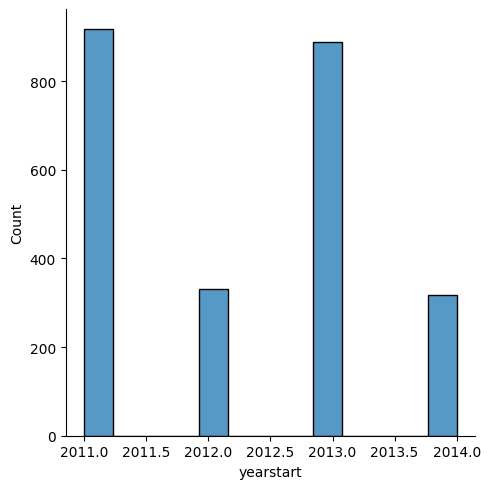

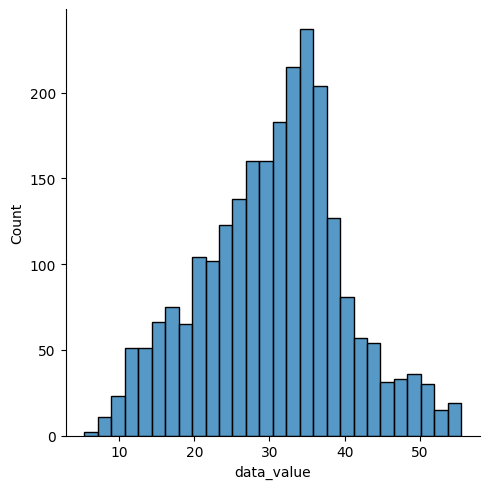

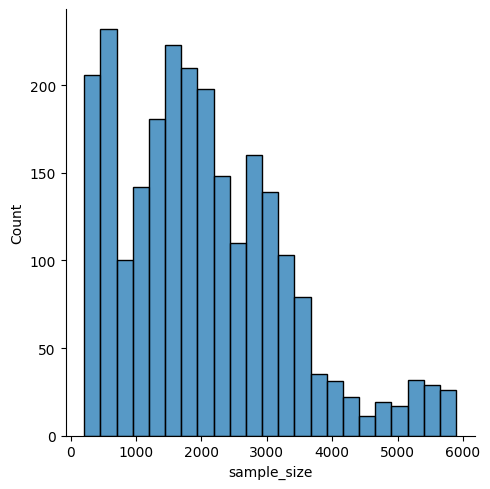

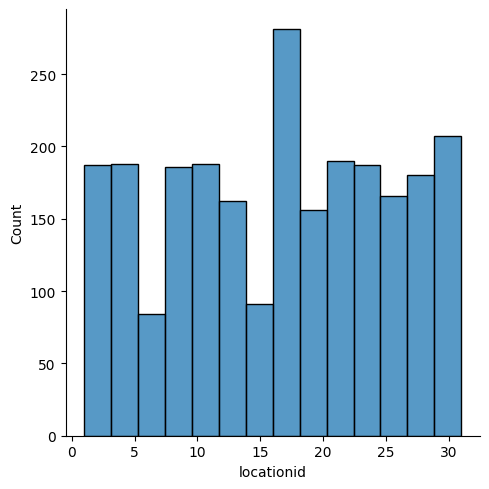

In [28]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [29]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 3 to 19245
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    2453 non-null   int64  
 1   data_value   2453 non-null   float64
 2   sample_size  2453 non-null   float64
 3   locationid   2453 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 95.8 KB


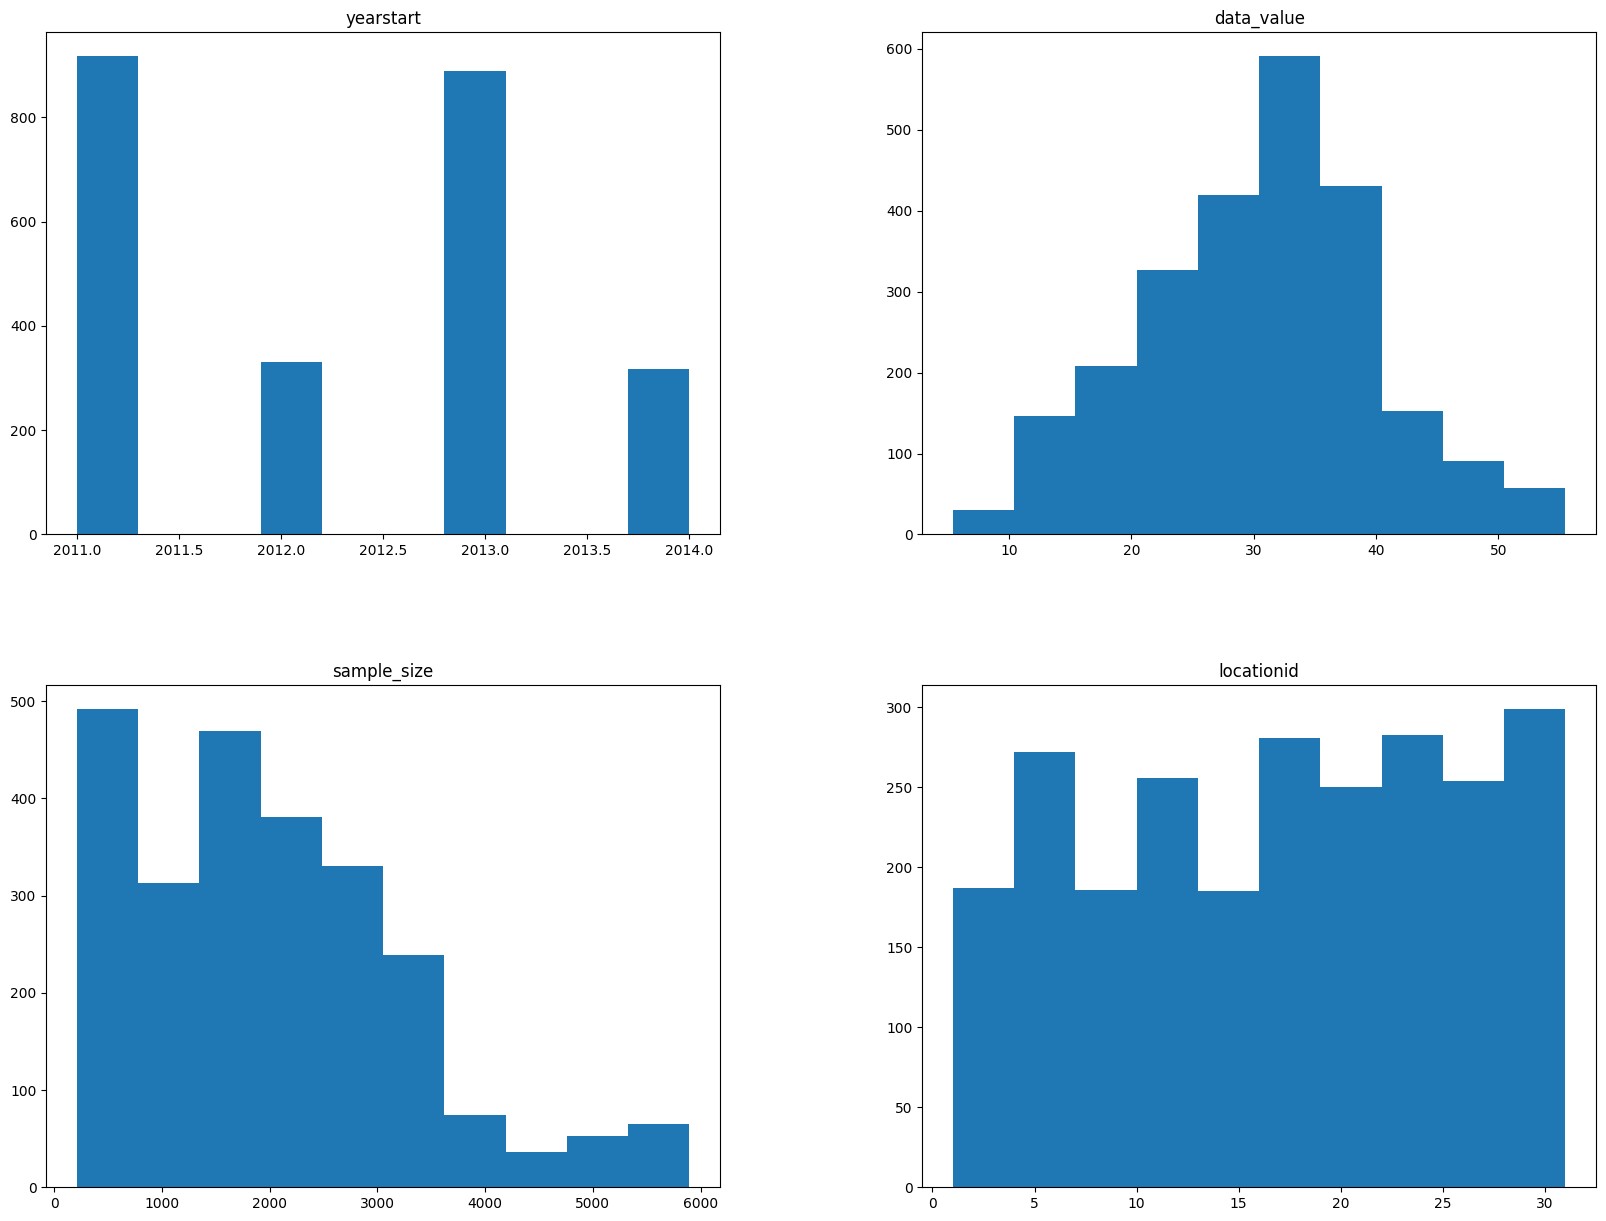

In [30]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

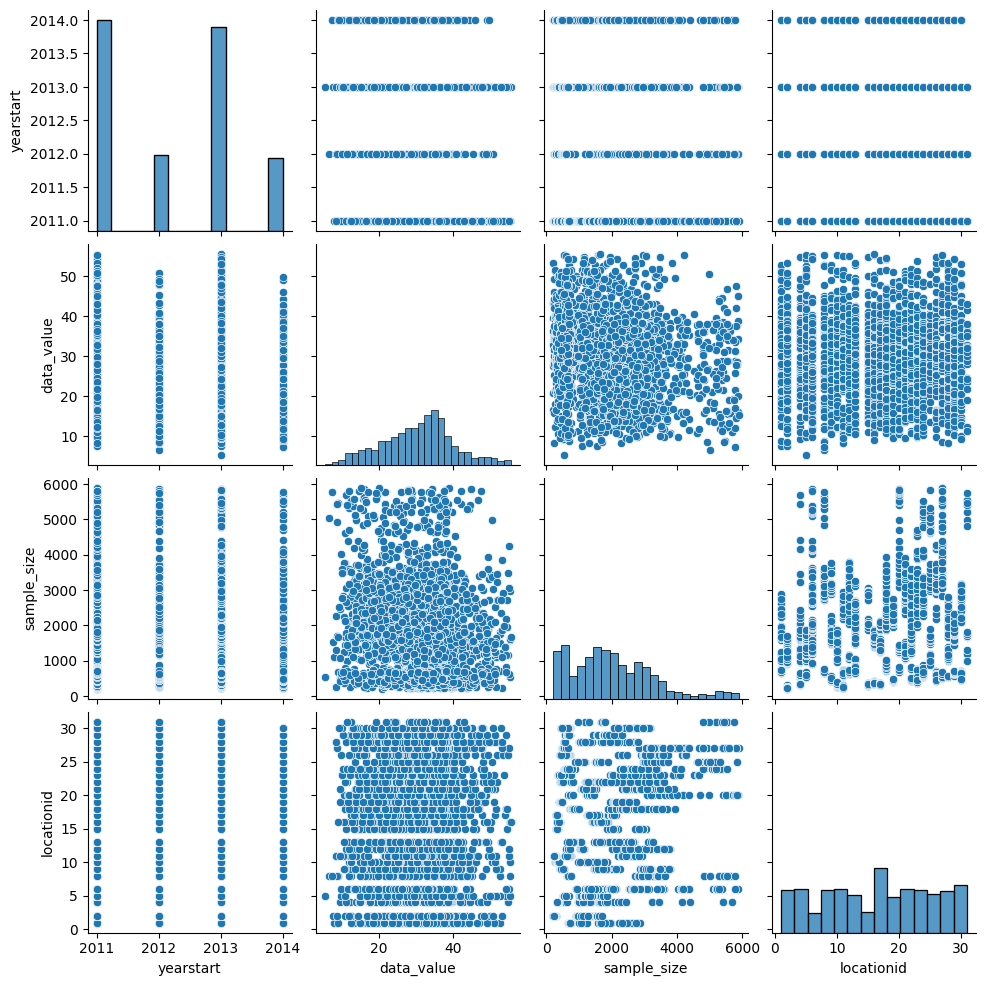

In [31]:
sns.pairplot(numerical)

In [32]:
numerical.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,-0.003142,-0.055475,-0.008664
data_value,-0.003142,1.000000,-0.145854,0.012265
sample_size,-0.055475,-0.145854,1.000000,0.231951
locationid,-0.008664,0.012265,0.231951,1.000000


<Axes: >

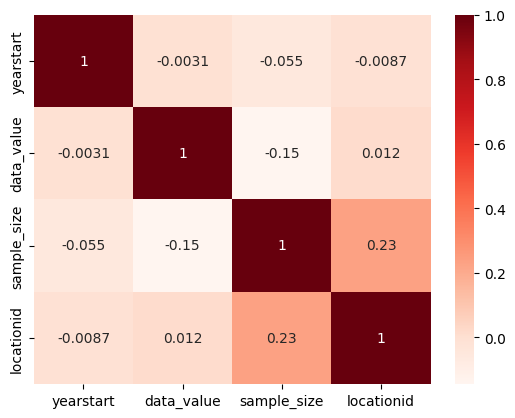

In [33]:
corr = numerical.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap='Reds')

In [34]:
#X = df[['yearstart','income', 'locationid']]
X = df[['yearstart','education', 'locationid']]
y = numerical['data_value']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,education,locationid
1120,2013,1,2.0
9560,2011,3,18.0
17124,2011,3,29.0


In [36]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)

In [38]:
X_test_scaled=std_scaler.transform(X_test)

In [39]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.69093516 -0.42468312 -1.6225918 ]
 [-1.14265938  1.37354356  0.18627246]
 [-1.14265938  1.37354356  1.42986664]
 ...
 [-1.14265938  1.37354356  0.07321844]
 [ 0.69093516  0.47443022  0.97765057]
 [ 0.69093516 -0.42468312 -1.28342975]]
--------
[[ 0.69093516 -1.32379646 -1.73564581]
 [-0.22586211  1.37354356  0.63848852]
 [-1.14265938  0.47443022  0.29932647]
 ...
 [-1.14265938 -0.42468312 -1.28342975]
 [-0.22586211 -0.42468312 -0.15288959]
 [-0.22586211  1.37354356  1.54292065]]


In [40]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     27.14
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.78e-17
Time:                        09:38:22   Log-Likelihood:                -6260.3
No. Observations:                1717   AIC:                         1.253e+04
Df Residuals:                    1713   BIC:                         1.255e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6851      0.224    136.957      0.0

In [41]:
predictions_test

array([33.59412926, 27.82484395, 29.71625813, 31.67195314, 29.90061201,
       31.51836121, 27.8178427 , 33.362254  , 33.46281066, 33.43629302,
       27.99243839, 27.79132507, 31.29348719, 33.17790012, 31.72923272,
       33.26869859, 29.60318634, 33.29245928, 31.53087634, 33.44605122,
       28.12375699, 27.78432382, 33.44605122, 29.71350119, 31.50435871,
       31.46383857, 31.70271509, 31.36752622, 31.39404385, 29.82381604,
       27.98268019, 33.34549456, 31.61191662, 33.56336732, 33.4795701 ,
       27.76756437, 33.58012676, 31.76275161, 33.38601469, 31.57839773,
       33.2589404 , 31.76550855, 33.15838373, 33.14162429, 29.63246091,
       31.41356024, 29.56966745, 33.63040509, 33.362254  , 31.44432218,
       31.59791412, 29.61294453, 31.45132343, 33.39577289, 33.18490137,
       31.3968008 , 29.48862717, 27.91839936, 29.65622161, 33.36649831,
       29.52214606, 29.69674175, 28.18655046, 33.41253233, 33.18214443,
       29.64922036, 29.46911079, 31.66495189, 31.63567731, 29.55

In [42]:
print(model.rsquared_adj)

0.04370793402567563


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
model.coef_

array([-0.02651764, -1.81461821, -0.01675944])

In [45]:
model.intercept_

86.99089083264589

In [46]:
model.score(X_test_scaled,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-36.09677084645852

In [47]:
y_pred=model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
y_test

483      34.2
12503    15.0
10292    48.0
4326     36.6
3463     17.3
         ... 
5868     31.2
4555     29.1
2257     34.6
7771     31.3
17879    10.1
Name: data_value, Length: 736, dtype: float64

In [49]:
y_pred

array([89.40384249, 84.49372229, 86.1552652 , 87.78144857, 86.17610714,
       87.72145764, 84.51424415, 89.4202548 , 89.43162314, 89.40731184,
       84.51266952, 84.48993285, 87.7173481 , 89.39941286, 87.76661088,
       89.38836462, 86.07854186, 89.36973749, 87.78681264, 89.42972841,
       84.48488887, 84.5104547 , 89.42972841, 86.11232677, 87.76250134,
       87.77923375, 87.74229958, 87.70440514, 87.72871643, 86.14611168,
       84.49025294, 89.41836008, 87.75334782, 89.44299147, 89.43351786,
       84.50855998, 89.44488619, 87.77040033, 89.40162767, 87.74955838,
       89.36594804, 87.81333875, 89.35457971, 89.35268498, 86.14579159,
       87.77354958, 86.07475242, 89.45057036, 89.4202548 , 87.7344006 ,
       87.79439153, 86.10095844, 87.71387875, 89.42404425, 89.378891  ,
       87.77165486, 86.10821723, 84.52561248, 86.12716446, 89.35679452,
       86.11200668, 86.11043205, 84.55592804, 89.42593897, 89.33595258,
       86.14768631, 86.06338408, 87.80197042, 87.7347207 , 86.11

In [50]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

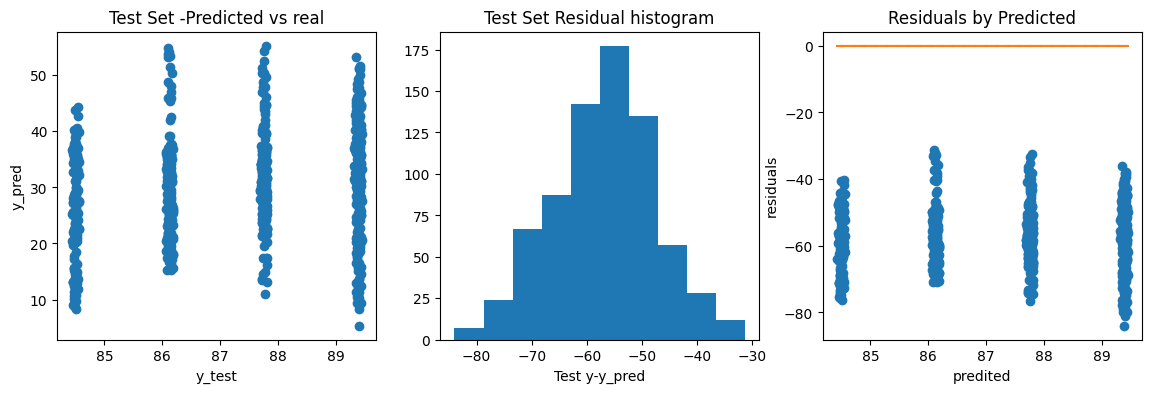

In [51]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: xlabel='y_test', ylabel='y_pred'>

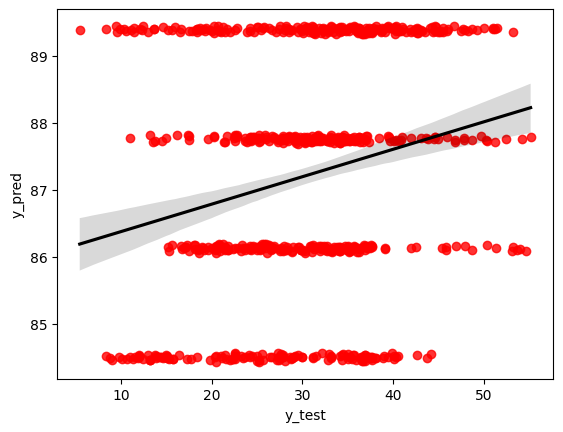

In [52]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [53]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 3331.8848430268554
R-squared: -36.09677084645852
Adjusted R-squared: -36.24880679255056


In [54]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [55]:
features_importances

,Attribute,Importance
1,education,1.814618
0,yearstart,0.026518
2,locationid,0.016759


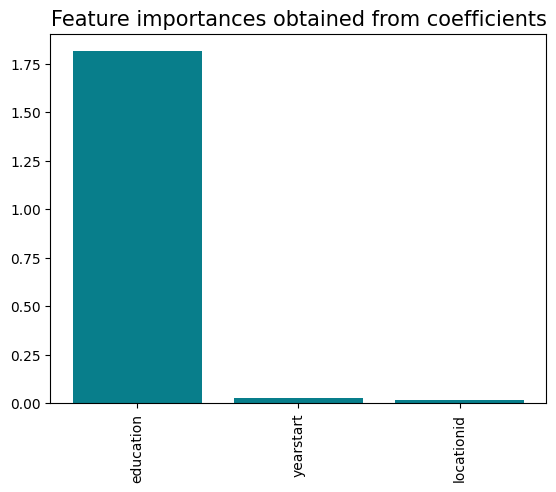

In [56]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.to_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')